In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [25]:
df = pd.read_csv('../data/processed/air_quality_cleaned.csv')
print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   PM2.5   PM10   NO2   NOx     NH3    CO    SO2     O3  Benzene  Toluene  \
0  65.37  72.38  8.07  8.57  13.395  0.64  16.31   8.02     1.63     4.34   
1  56.28  72.38  8.02  8.51  13.395  0.60  18.93   6.20     1.52     3.74   
2  48.17  72.38  8.00  8.55  13.395  0.65  18.99   7.97     1.23     4.74   
3  33.56  72.38  7.89  8.56  13.395  0.72  11.28  10.18     0.61     3.85   
4  31.30  72.38  8.10  8.49  13.395  0.55  10.29   7.44     0.52     2.31   

   ...  date_2020-06-22  date_2020-06-23  date_2020-06-24  date_2020-06-25  \
0  ...            False            False            False            False   
1  ...            False            False            False            False   
2  ...            False            False            False            False   
3  ...            False            False            False            False   
4  ...            False            False            False            False   

   date_2020-06-26  date_2020-06-27  date_

In [26]:
X = df.drop(['PM2.5', 'Date'], axis=1, errors='ignore')  # drop target & date
y = df['PM2.5']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (8740, 1965), Test size: (2186, 1965)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

In [31]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")

# --- 6b. Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # RF doesn’t need scaling
y_pred_rf = rf.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

Linear Regression MSE: 183.80, R2: 0.62


In [43]:
joblib.dump(rf, '../models/pollution_model.pkl')
print("Model saved as 'pollution_model.pkl'")

Model saved as 'pollution_model.pkl'


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

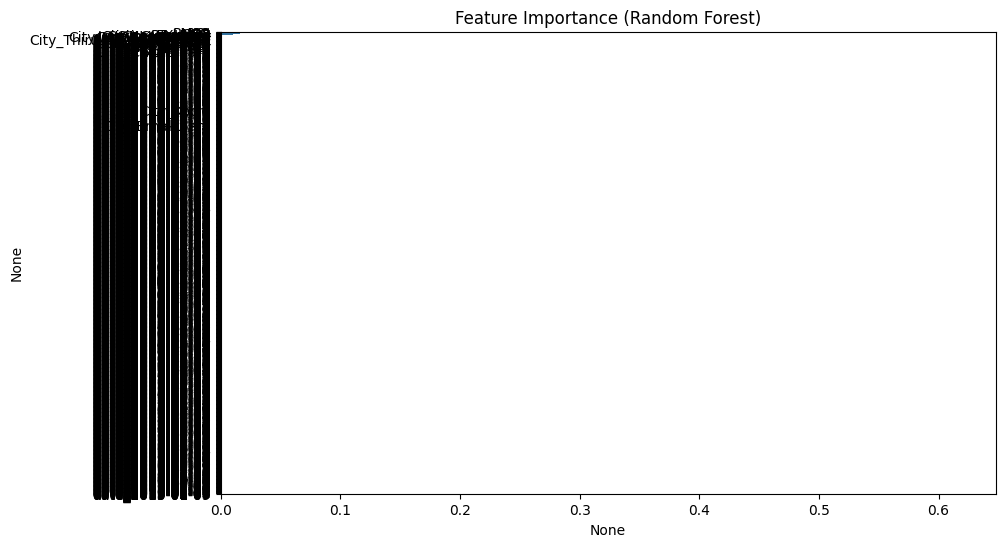

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()